### We examine the relations between forces, encoders, steps, and positions
This test was done on Thursday night (3/4/20)

In [29]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<Figure size 432x288 with 0 Axes>

In [30]:
start = Time('2020-03-05T22:41:00') #this is UTC
end = Time('2020-03-05T22:46:00') 

In [31]:
def readSqXlsx(c1,c2):
    wb = load_workbook(filename='M2basicTest.xlsx', read_only=True)
    ws = wb['Sheet1']
    data_rows = []
    for row in ws[c1:c2]:
        data_cols = []
        for cell in row:
            data_cols.append(cell.value)
        data_rows.append(data_cols)
    return np.array(data_rows)
def getSlope(x, y):
    return np.mean(y[1:]-y[:-1])/np.mean(x[1:]-x[:-1])
def getDelta(y):
    return np.mean(y[1:]-y[:-1])

#### We recorded some data in the Excel file by hand. Let's look at those first
Open loop: the input was B1 steps 

In [32]:
aa = readSqXlsx('C9','N13')

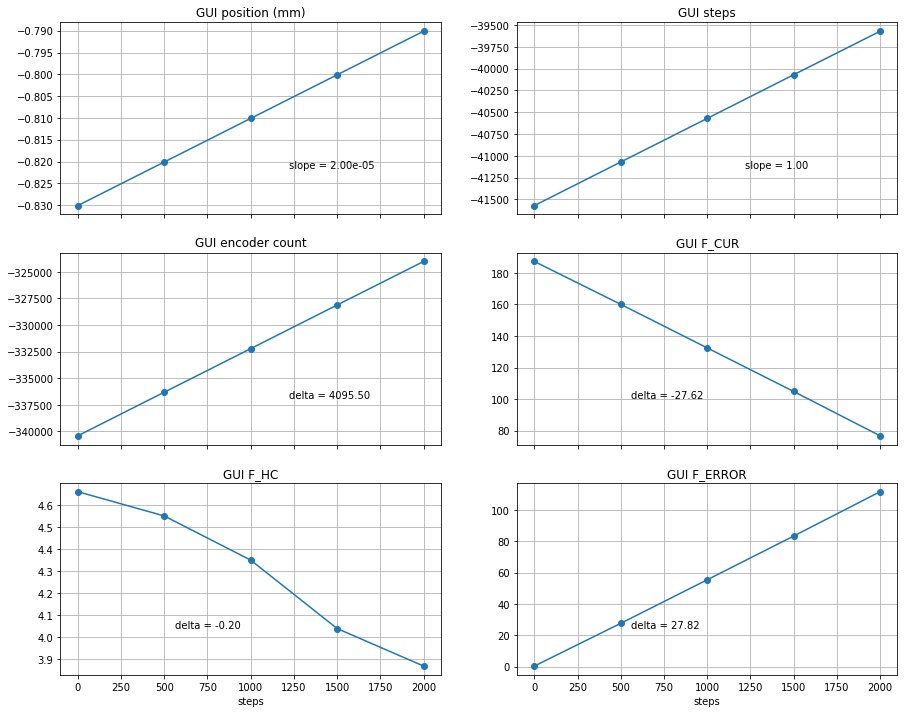

In [33]:
fig, ax = plt.subplots(3,2, figsize=(15, 3*4), sharex=True)
instep = aa[:,0]
guimm = aa[:,1]
ax[0][0].plot(instep, guimm,'-o')
ax[0][0].text(0.6, 0.24, "slope = %.2e"%getSlope(instep, guimm), color = 'black', transform=ax[0][0].transAxes)
ax[0][0].grid()
ax[0][0].set_title('GUI position (mm)');

guisteps = aa[:,2]
ax[0][1].plot(instep, guisteps,'-o')
ax[0][1].text(0.6, 0.24, "slope = %.2f"%getSlope(instep,guisteps), color = 'black', transform=ax[0][1].transAxes)
ax[0][1].grid()
ax[0][1].set_title('GUI steps');

guiec = aa[:,3]
ax[1][0].plot(instep, guiec,'-o')
ax[1][0].text(0.6, 0.24, "delta = %.2f"%getDelta(guiec), color = 'black', transform=ax[1][0].transAxes)
ax[1][0].grid()
ax[1][0].set_title('GUI encoder count');

#F_cmd in GUI does not change

guifcur = aa[:,5]
ax[1][1].plot(instep, guifcur,'-o')
ax[1][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guifcur), color = 'black', transform=ax[1][1].transAxes)
ax[1][1].grid()
ax[1][1].set_title('GUI F_CUR');

guifhc = aa[:,6]
ax[2][0].plot(instep, guifhc,'-o')
ax[2][0].text(0.3, 0.24, "delta = %.2f"%getDelta(guifhc), color = 'black', transform=ax[2][0].transAxes)
ax[2][0].set_xlabel('steps')
ax[2][0].set_title('GUI F_HC');
ax[2][0].grid()

guife = aa[:,7]
ax[2][1].plot(instep, guife,'-o')
ax[2][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guife), color = 'black', transform=ax[2][1].transAxes)
ax[2][1].set_xlabel('steps')
ax[2][1].grid()
ax[2][1].set_title('GUI F_ERROR');

#EFD encoder position is same as GUI position.
#EFD F_CUR is same as GUI F_CUR

Questions already addressed in a01_OL_stroke.ipynb
* EFD steps do not seem to change, checked EFD, it is NOT because of digits we were able to read from Chronograf.
* F_CMD seems to be LUT force. It doesn't change in this process. F_CUR is decreasing, it is the force being applied. F_HC doesn't make sense. Ignore it.

In [34]:
client = EfdClient('summit_efd')
csc_index = 1

In [35]:
start.tai

<Time object: scale='tai' format='isot' value=2020-03-05T22:41:37.000>

In [36]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.axialActuatorAbsolutePositionSteps', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,axialAbsolutePositionSteps0,axialAbsolutePositionSteps1,axialAbsolutePositionSteps10,axialAbsolutePositionSteps11,axialAbsolutePositionSteps12,axialAbsolutePositionSteps13,axialAbsolutePositionSteps14,axialAbsolutePositionSteps15,axialAbsolutePositionSteps16,axialAbsolutePositionSteps17,...,axialAbsolutePositionSteps71,axialAbsolutePositionSteps8,axialAbsolutePositionSteps9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:41:00.049000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5714775,1.583448e+09
2020-03-05 22:41:00.088000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5714784,1.583448e+09
2020-03-05 22:41:00.137000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5714793,1.583448e+09
2020-03-05 22:41:00.188000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5714803,1.583448e+09
2020-03-05 22:41:00.239000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5714812,1.583448e+09


In [37]:
df.tail()

,axialAbsolutePositionSteps0,axialAbsolutePositionSteps1,axialAbsolutePositionSteps10,axialAbsolutePositionSteps11,axialAbsolutePositionSteps12,axialAbsolutePositionSteps13,axialAbsolutePositionSteps14,axialAbsolutePositionSteps15,axialAbsolutePositionSteps16,axialAbsolutePositionSteps17,...,axialAbsolutePositionSteps71,axialAbsolutePositionSteps8,axialAbsolutePositionSteps9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:45:59.789000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5769021,1.583448e+09
2020-03-05 22:45:59.851000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5769030,1.583448e+09
2020-03-05 22:45:59.890000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5769039,1.583448e+09
2020-03-05 22:45:59.941000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5769048,1.583448e+09
2020-03-05 22:45:59.989000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583448e+09,37859,1.583448e+09,5c3efb6d,5769057,1.583448e+09


### Answer to first questin above: Not sure what is going on. EFD does show this is -316 everywhere.

In [38]:
df = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,axialForceMeasured0,axialForceMeasured1,axialForceMeasured10,axialForceMeasured11,axialForceMeasured12,axialForceMeasured13,axialForceMeasured14,axialForceMeasured15,axialForceMeasured16,axialForceMeasured17,...,axialForceMeasured71,axialForceMeasured8,axialForceMeasured9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:41:00.036000+00:00,187.208908,187.967941,189.894638,191.930206,187.843369,189.159103,187.314606,189.861176,190.211929,184.779373,...,251.679840,183.882126,183.942886,1,1.583448e+09,37859,1.583448e+09,f6f121a3,5714773,1.583448e+09
2020-03-05 22:41:00.085000+00:00,187.254181,187.978104,189.838623,191.909958,187.884171,189.199692,187.294373,189.850998,190.125519,184.794540,...,251.740204,183.912704,184.039352,1,1.583448e+09,37859,1.583448e+09,f6f121a3,5714782,1.583448e+09
2020-03-05 22:41:00.135000+00:00,187.234055,187.922195,189.996506,192.021332,187.940292,189.113464,187.334824,189.835739,190.206848,184.809708,...,251.735168,183.718994,184.095200,1,1.583448e+09,37859,1.583448e+09,f6f121a3,5714791,1.583448e+09
2020-03-05 22:41:00.186000+00:00,187.218964,188.013672,189.960846,191.996033,187.858673,189.093170,187.360092,189.840820,190.166183,184.759155,...,251.715042,183.739380,183.968277,1,1.583448e+09,37859,1.583448e+09,f6f121a3,5714801,1.583448e+09
2020-03-05 22:41:00.237000+00:00,187.203873,187.962860,189.858994,191.909958,187.863770,189.148972,187.334824,189.856079,190.252609,184.875443,...,251.699966,183.673111,183.866730,1,1.583448e+09,37859,1.583448e+09,f6f121a3,5714810,1.583448e+09


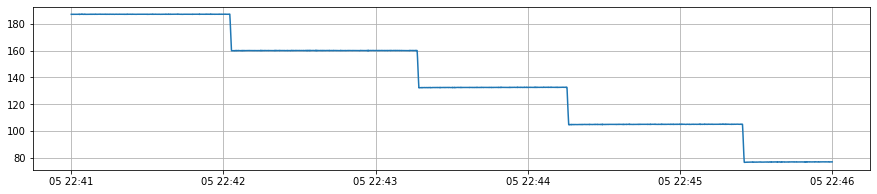

In [39]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.axialForceMeasured0)
plt.grid();
#forces on B1 are consistent between EFD and GUI

### if these are indeed the total forces measured, the sum should not change during this experiement.

In [40]:
print('beginning total = %.2f, ending total = %.2f'%(sum([df['axialForceMeasured%d'%i][0] for i in range(72)]), 
                     sum([df['axialForceMeasured%d'%i][-1] for i in range(72)])))
#LTS-107, sec 3.8.1 specifies M2 mirror mass budget ass 1600kg
print('mass budget = %.2f'%(1600*9.8))

beginning total = 15578.35, ending total = 15578.23
mass budget = 15680.00


In [41]:
mat = scipy.io.loadmat('mat/0305/CellTelemetry_2020-03-05_203926_002.mat')
print(mat['data'].dtype.names)
mdata = mat['data']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}
t = [datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']]
t = np.array([ti+ timedelta(hours=4, minutes=3, seconds=-5) for ti in t]) #convert to utc, 4 hours ahead of Rochester
columns = [n for n, v in ndata.items()]
nonHP = [i for i in range(78) if i+1 not in ndata['hp'][0,:]]
nonHPa = [i for i in range(72) if i+1 not in ndata['hp'][0,:]] #a for axial actuator only

def insertHPColumns(a):
    [n1, n2] = a.shape
    b = np.zeros((n1, n2+6))
    ii = 0
    for i in range(n2+6):
        if i in nonHP:
            b[:,i] = a[:,ii]
            ii += 1
        else:
            b[:,i] = 0
    return b

ndata['f_hp'] = insertHPColumns(ndata['f_hp'])
ndata['f_error'] = insertHPColumns(ndata['f_error'])

('time_delta', 'comm_cntr', 'ilc_status', 'encoder', 'force', 'disp_sensors', 'temp_sensors', 'inclinometer', 'step_cmd', 'inc_cal', 'elevation_ts_i', 'elevation_ts_u', 'elevation_ang', 'el_status', 'disp_proc', 'disp_status', 'temp_proc', 'temp_status', 'hp', 'f_e', 'f_0', 'f_a', 'f_f', 'T_u', 'T_x', 'T_y', 'T_r', 'f_hp', 'f_cmd', 'f_error', 'f_delta', 'f_cmd_wrd', 'mtr_voltage', 'comm_voltage', 'mtr_current', 'comm_current', 'dig_input', 'dig_output', 'mtr_voltage_proc', 'comm_voltage_proc', 'mtr_current_proc', 'comm_current_proc', 'time', 'timestamp')


In [42]:
#This starting time is now consistent with binary file name as well
t[0]

datetime.datetime(2020, 3, 5, 22, 19, 27, 730000)

In [43]:
nn = len(t)
print('%d, time duration = %.0f minutes'%(nn, nn/20/60))

59999, time duration = 50 minutes


In [44]:
# cut out only the time period we are interested in
idx = (t>start) & (t<end)
data = {}
for n, v in ndata.items():
    if len(v.shape)>1:
        data[n] = v[idx,:]
    else:
        data[n] = v[idx]
t = t[idx]

### Now EFD force data match the binary force

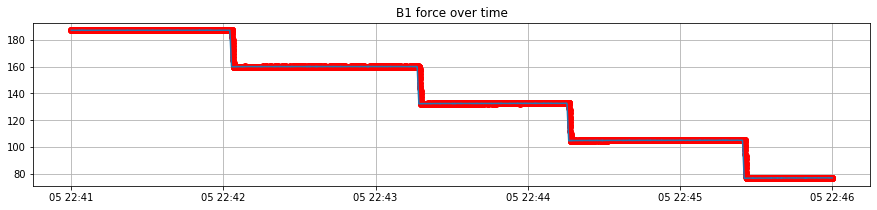

In [45]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data['force'][:,0],'-ro')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.axialForceMeasured0)
plt.title('B1 force over time')
plt.grid();

#### All actuators forces, EFD vs. binary, over 5s

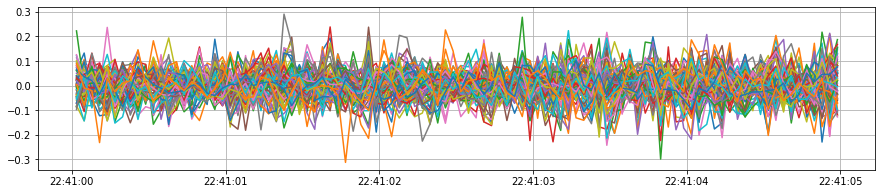

In [46]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    plt.plot(t[:100], data['force'][:100,i]-np.array(df['axialForceMeasured%d'%i][:100]))
plt.grid();

#### When we looked at the GUI, it appeared that F_CMD - F_CUR - F_HC = F_ERROR. Is that always true?
No, see below

act#6, F_HC[0] = 0.00, residual[0] = 4.30
act#16, F_HC[0] = 0.00, residual[0] = 6.58
act#26, F_HC[0] = 0.00, residual[0] = 6.04


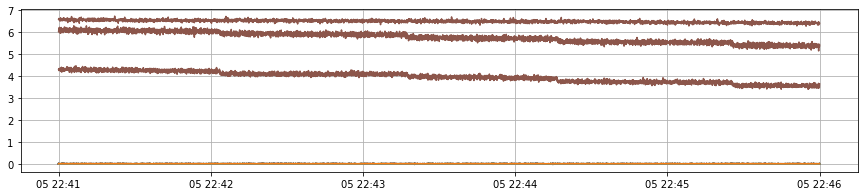

In [47]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    aa = data['f_cmd'][:,i] - data['force'][:,i] - data['f_hp'][:,i]-data['f_error'][:,i]
    plt.plot(t, aa)
    if (aa[0]>10) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()

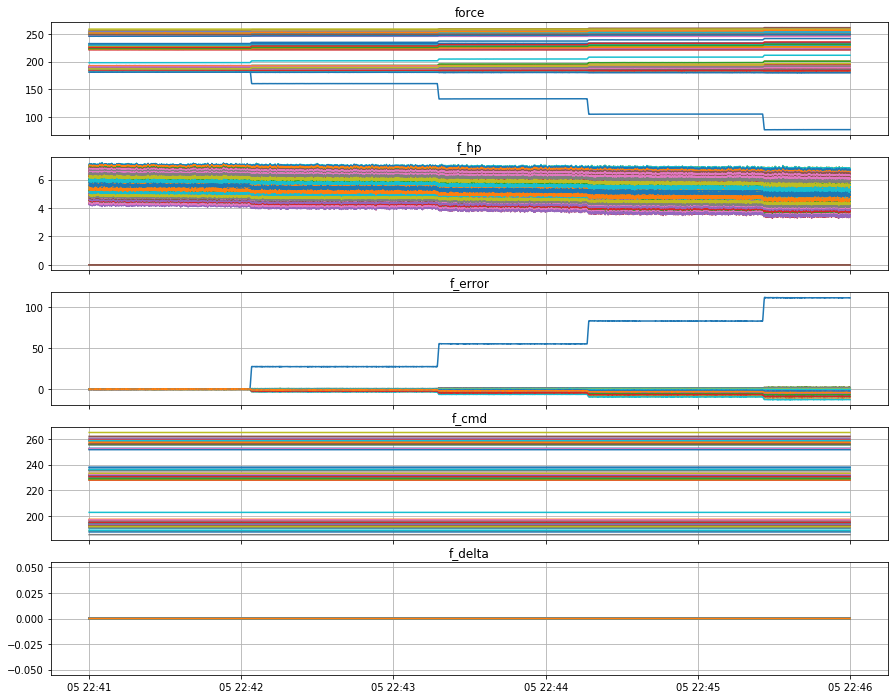

In [48]:
fig, ax = plt.subplots(5,1, sharex=True, figsize=(15,12))
for i in range(72):
    ax[0].plot(t, data['force'][:,i] )
ax[0].grid()
ax[0].set_title('force')

for i in range(72):
    ax[1].plot(t, data['f_hp'][:,i] )
ax[1].grid()
ax[1].set_title('f_hp')

for i in range(72):
    ax[2].plot(t, data['f_error'][:,i] )
ax[2].grid()
ax[2].set_title('f_error')

for i in range(72):
    ax[3].plot(t, data['f_cmd'][:,i] )
ax[3].grid()
ax[3].set_title('f_cmd')

for i in range(72):
    ax[4].plot(t, data['f_delta'][:,i] )
ax[4].grid()
ax[4].set_title('f_delta');
#fig.subplots_adjust(hspace=0)

sum = 312.19 N


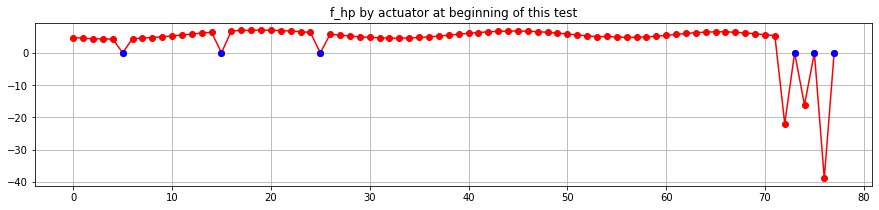

In [49]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['f_hp'][0,:],'-ro')
plt.plot(data['hp'][0]-1, data['f_hp'][0,data['hp'][0]-1],'bo',label='HP') #color HP with blue
plt.grid()
plt.title('f_hp by actuator at beginning of this test')
print('sum = %.2f N'%sum(data['f_hp'][0,:]))
#sh*t, word doc says F_HC = f_hp, but why it is not zero on B6,16,26??? what is going on with last 3 actuators???

In [50]:
aa = np.loadtxt('../github/data/M2_1um_72_force.txt')
# to have +x going to right, and +y going up, we need to transpose and reverse x and y
xact = -aa[:,2]
yact = -aa[:,1]
#actLabels = [i+10 for i in range(72)]

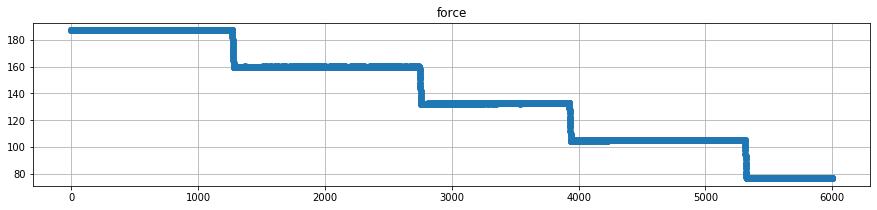

In [51]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['force'][:,0],'-o')
plt.title('force')
plt.grid() 

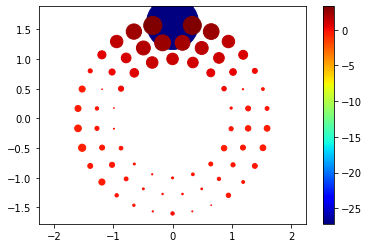

In [52]:
aa = data['force'][2000,:72]- data['force'][0,:72] 
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.axis('equal')
plt.colorbar();

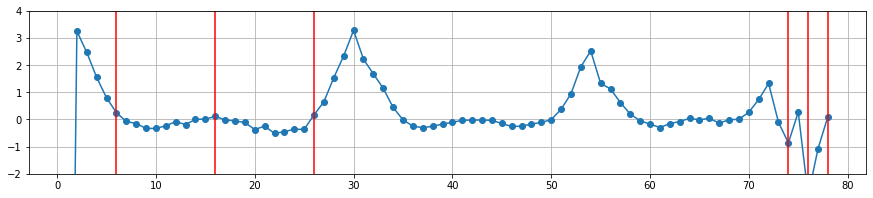

In [53]:
x0 = np.linspace(1,78, 78)
aa = data['force'][2000,:]- data['force'][0,:] 
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(x0,aa,'-o')
plt.grid()
yy=[-2, 4]
plt.ylim(yy)
for i in data['hp'][0]:
    plt.plot([i,i],yy,'-r')
#ax.set_xticklabels(actLabels)

act#6, F_HC[0] = 0.00, residual[0] = 4.30
act#16, F_HC[0] = 0.00, residual[0] = 6.58
act#26, F_HC[0] = 0.00, residual[0] = 6.04


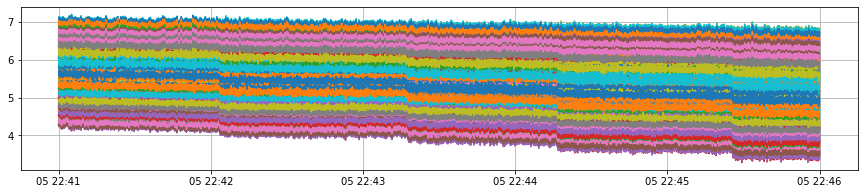

In [54]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    aa = data['f_cmd'][:,i] - data['force'][:,i] -data['f_error'][:,i] #- data['f_hp'][:,i]#
    plt.plot(t, aa)
    if (aa[0]>10) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()

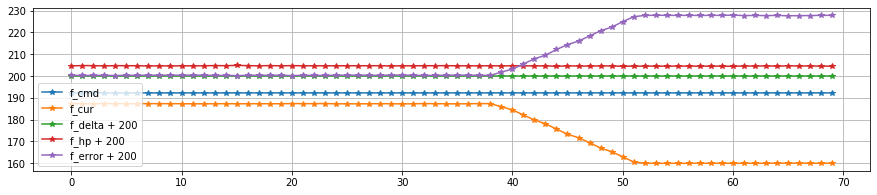

In [59]:
fig, ax = plt.subplots(figsize=(15,3))
i = 0
idx = range(1230,1300)
#aa = data['f_cmd'][idx,i] - data['force'][idx,i] -data['f_error'][idx,i] #- data['f_hp'][:,i]#
#plt.plot(aa,'-o')
plt.plot(data['f_cmd'][idx,i],'-*', label = 'f_cmd')
plt.plot(data['force'][idx,i],'-*', label = 'f_cur')
plt.plot(data['f_delta'][idx,i]+200,'-*', label = 'f_delta + 200')
plt.plot(data['f_hp'][idx,i]+200,'-*', label = 'f_hp + 200')
plt.plot(data['f_error'][idx,i]+200,'-*', label = 'f_error + 200')
plt.legend()
if (aa[0]>10) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()

### This is our understanding from this test: (this test is very similar to a01_OL_stroke.ipynb, the only difference is that we commanded B1 via steps instead of stroke)
* stroke = position
* stroke and position are proportional to steps and encoder, 
    * each micron is 50 steps, or 410 encoder count
* stroke and position are inversely proportional to forces (M2 facing down)
    * each micron is 2.8N
* M2 FB system seems to be working, but f_hp is useless, so are f_error and f_delta.
* f_cmd is the LUT forces. Proof in a03_LUT_0.ipynb
* f_cur is the measured force (simply called "force" in binary file)
* https://github.com/lsst-ts/ts_mtm2/blob/master/configuration/lsst-m2/config/system/cell/actuator_configuration_data/A_Model_14902-1000_SN_001.xml
    * for S/N=001, 1.99675366010000E-5 mm/step, 8.19562539783576 counts/step